# The Arnol'd Circle Map

### Recommended Reading

-Glass & Mackey, *From clocks to chaos: the rhythyms of life*, Princeton Univ. Press, 1988

-Mosheiff et al., "Inheritance of cell-cycle duration in the presence of periodic forcing", 2018. https://journals.aps.org/prx/abstract/10.1103/PhysRevX.8.021035

In this demo, we investigate the **Arnol'd circle system**, a crucial starting point for several models in chronobiology. In terms of a shift parameter $\tau\in \mathbb{R}$ and a coupling strength parameter $b\in \mathbb{R}$, the Arnol'd system reads 
$$
T_{n+1} = T_{n} + \tau +b\sin\left(2\pi T_n\right), 
$$
which descends to a dynamical system on the circle upon taking both sides mod 1. 

This system is named after its first investigator, the great Vladimir I. Arnol'd (https://en.wikipedia.org/wiki/Vladimir_Arnold). 

Over the course of our numerical experiments, we'll discuss bifurcations in the Arnol'd system, and pay special attention to periodic orbits and their characteristic **rotation numbers** (see the lecture notes for more details). This will lead to some amazingly rich geometry and some beautiful pictures.  

The first step, of course, is to import our main packages and take care of some bookkeeping related to figure displays. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# this makes sure the images don't come out looking muddy on 
# retina displays (which your computer probably uses)
%matplotlib inline
%config InlineBackend.figure_format='retina'

# create nice fonts for plots
# ATTN: if you don't have LATEX installed on your computer, please comment this out!
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Now, we write a code for simulating Arnol'd dynamics on the line. To descend to the circle, simply take the result mod 1. 

In [2]:
def simulate(t0, N, tau = 0.2, b=1):
    
    t = np.zeros(N+1, dtype=float)

    t[0] = t0 # take initial state from the data

    for n in range(1,N+1):
        
        t[n] = t[n-1] + tau + b*np.sin(2.*np.pi*t[n-1])
        
    return t

Now, we try out the simulation and plot the results (on the circle). Many interesting parameter choices are commented out, but you can uncomment them to try these experiments yourself. By default, we start with $\tau=0.1, b=0.1$ and set our initial state to be near one of the equilibria. 

In [5]:
#tau = 0.32
#b = 0.4

#tau = 0.35
#b = 0.18

#tau = 0.65
#b = 0.18

#tau = 0.45
#b = 0.6

tau = 0.01
b = 0.1 # gradually crank this up by a factor of 2

# get equilibria (or representatives thereof :) )
teq1 = (1/(2*np.pi))*(-np.arcsin(tau/b))
teq2 = (1/(2*np.pi))*(np.pi+np.arcsin(tau/b))

N = int(20)

t = simulate(1.1*teq1, N, tau=tau, b=b)
nn = np.arange(0, N+1)

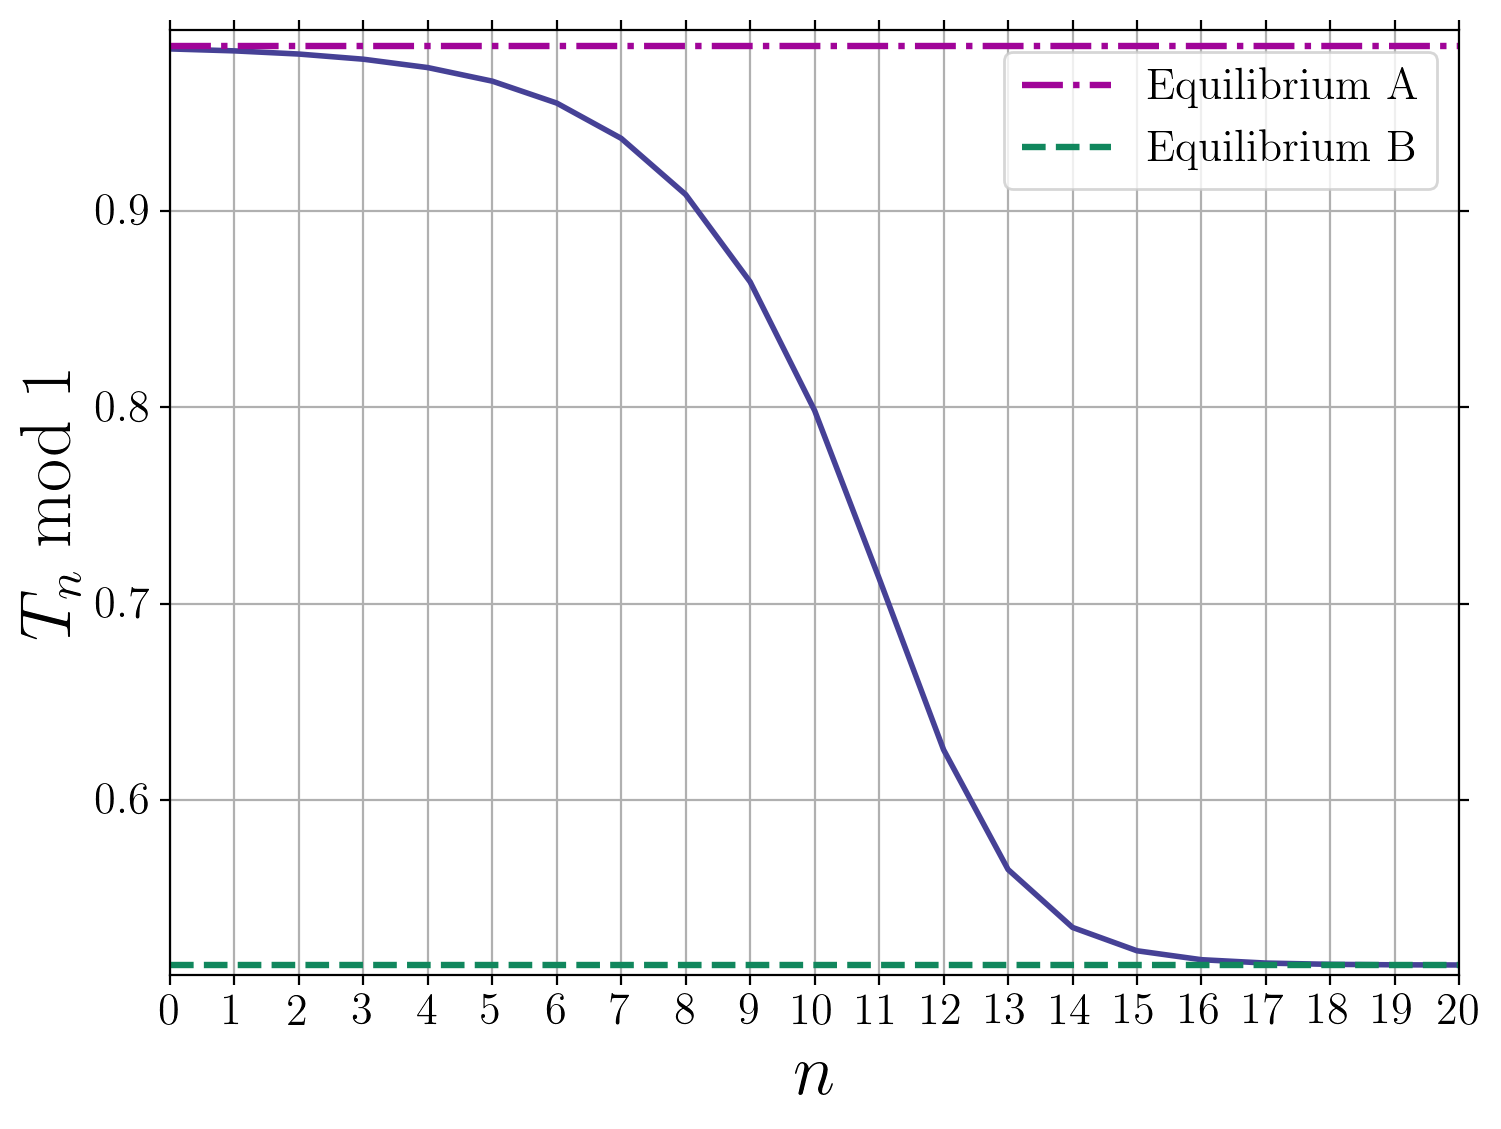

In [7]:
fig, ax = plt.subplots()   

tt =  np.mod(t,1)
plt.plot(nn, tt, color='xkcd:blueberry', linestyle='solid', linewidth=2)

plot_eq = True 

if plot_eq:
    
    plt.plot(nn, np.mod(teq1,1)*np.ones_like(nn), '-.', color='xkcd:barney purple', label='Equilibrium A', linewidth=2.3)
    plt.plot(nn, np.mod(teq2,1)*np.ones_like(nn), '--', color='xkcd:dark sea green', label='Equilibrium B', linewidth=2.3)
    
    ax.legend(fontsize=16, loc= 'best')

else: 
    
    pass

plt.xlabel(r"$n$", fontsize=26, color = 'k')
plt.ylabel(r"$T_{n} \ \mathrm{mod} \ 1$", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=8)
ax.locator_params(axis='x', nbins=8)

plt.xlim([0,N])
plt.ylim([0.99*np.amin(tt), 1.01*np.amax(tt)])

plt.frameon = True 
plt.grid(visible=True)

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
ax.locator_params(axis='x', nbins=20)

#figname = 'my_simulation.png' # change the name to whatever you like 
#plt.savefig(figname, dpi=700)
plt.show()

By holding $\tau$ constant and cranking up the coupling strength $b$, we can see the stable equilibrium ("equilibrium B") lose stability and get replaced with a stable periodic orbit or something more exotic! Let's create the bifurcation diagram for any fixed $\tau$ to get more insight into this. ** WARNING: the next two code boxes can take 5-10 minutes to run! **

In [19]:
#"""
tau = 0.01

bmin=1e-1 # smallest parameter value to look at. can't be too small!
bmax=3. # largest parameter value to look at 
num_b_samples= int(5e4) # number of parameter values we want to try
N=int(2e3) # number of time steps we perform in each sample
tail_size= 100 # size of the "tail" of the simulation we look at to identify the attractor
    
# create array of params to try
bb = np.linspace(bmin, bmax, num = num_b_samples, endpoint=True)

# pre-allocate storage for the tails (~ our attractors) 
tails = np.zeros([tail_size, num_b_samples])
    
for m in range(0,num_b_samples): 
    
    b = bb[m] # pick param
    
    t = simulate(0.,N, tau=tau, b=b) # perform simulation
    tail = t[-tail_size:] # estimate attractor from the tail
    
    tails[:, m] = np.mod(tail,1) # store attractor guess for that param value
#"""

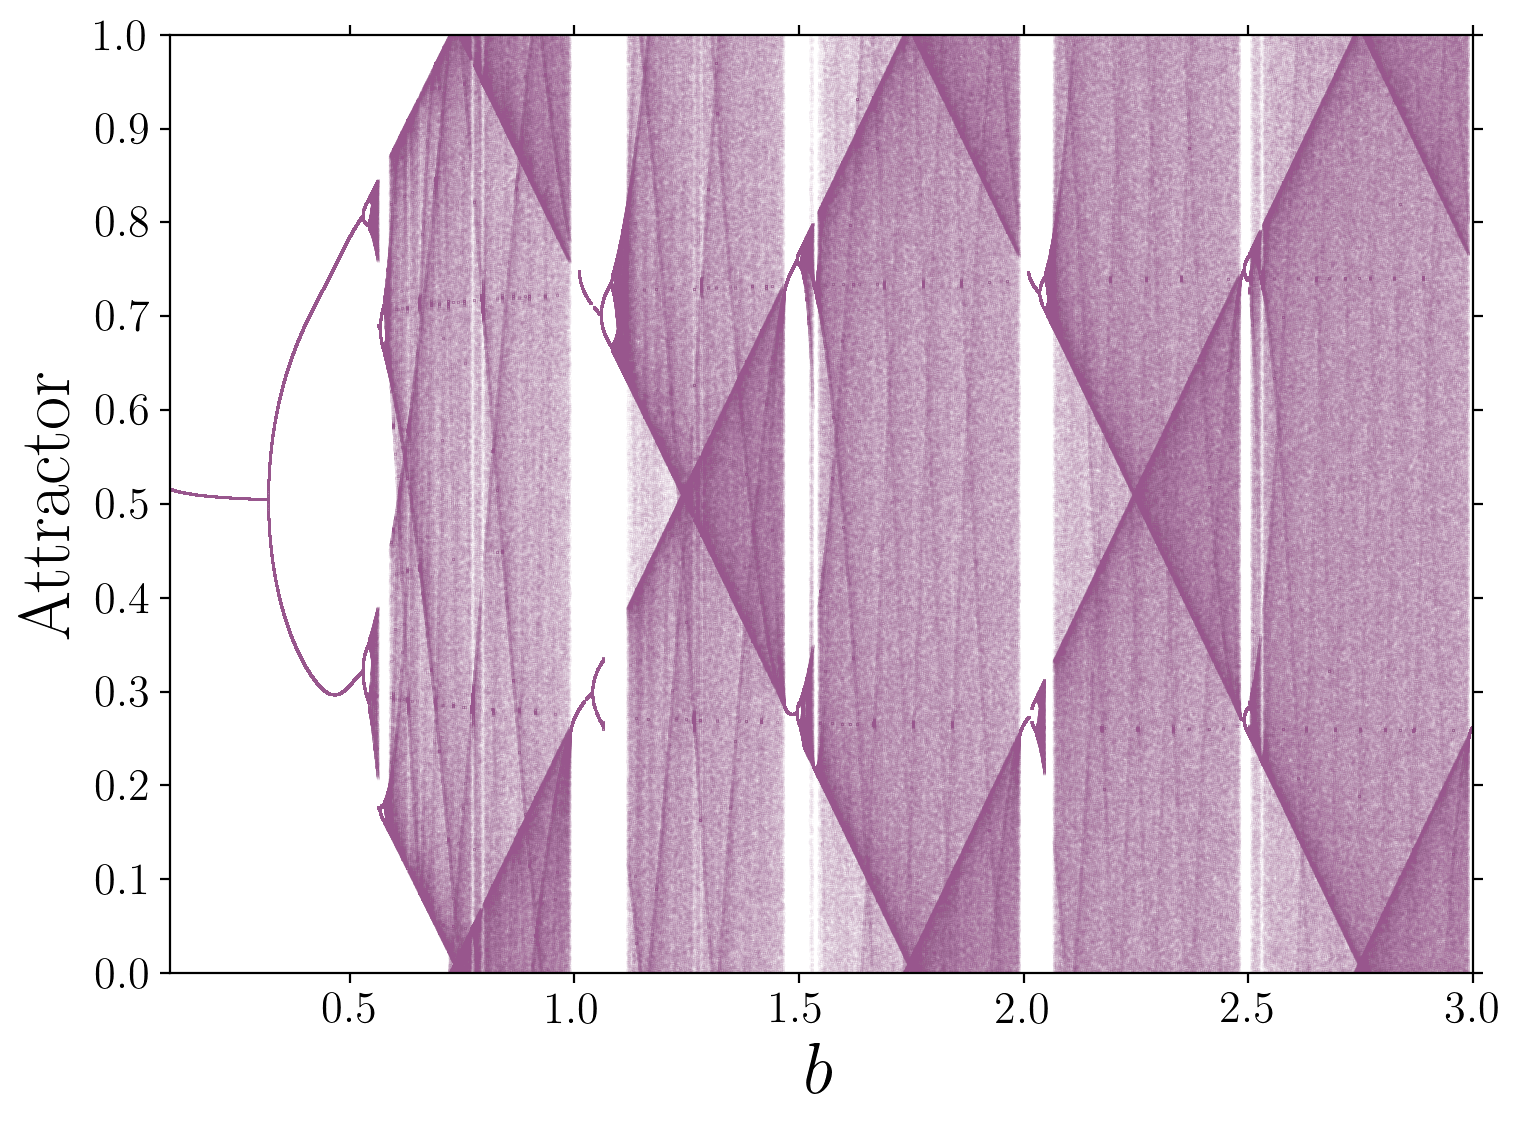

In [21]:
#"""
fig, ax =plt.subplots() 

plt.scatter(np.ravel(np.tile(bb,tail_size)),np.ravel(tails), s=1e-4, color='xkcd:purpleish')
plt.xlabel(r"$b$", fontsize=26, color = 'k')
plt.ylabel(r"Attractor", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=12)
ax.locator_params(axis='x', nbins=8)

plt.xlim([bmin, bmax])
plt.ylim([0, 1.])

plt.frameon = True 

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'arnold_bifurcation_diagram.png'
#plt.savefig(figname, dpi=700)

plt.show()
#"""

As we've come to expect by now, the bifurcation diagram is very rich, showing period doubling bifurcations, the potential for quasiperiodicity & chaos, and windowing. I encourage you to undertake further numerical experiments (that is, plot various orbits with different parameters) to cook up examples of chaotic orbits: of course, the bifurcation diagram we've just created will inspire your experiment design.  

Now, we'd really like a diagram that captures the change in our model's behaviour as we vary *both* $\tau$ and $b$. There are many ways to do this, but here we plot how the rotation number for the orbit $\mathcal{O}_0$ in the $\tau-b$ plane. Remember from the lecture notes that the rotation number can be used to detect **phase locking**. 

First, we write a function that estimates the rotation number of a given orbit (the orbit is the input of the function). This formula is based on the "integral form" of the rotation number given in the notes. 

In [22]:
def get_rotation_number(t):
        
    delta_t = t[1:]-t[:-1]
    
    out = np.mean(delta_t)
    
    return out 

Now, we prepare the grid of $\tau-b$ space we'll test. 

In [27]:
# Create array of parameter values to test 

taumin=0. # smallest parameter value to look at 
taumax=1. # largest parameter value to look at 
num_tau_samples= int(1e3) # number of parameter values we want to try
# 5e2
bmin=0.0 # smallest parameter value to look at 
bmax=1. # largest parameter value to look at 
num_b_samples= int(1e3) # number of parameter values we want to try

tautau = np.linspace(taumin, taumax, num = num_tau_samples, endpoint=True)
bb = np.linspace(bmin, bmax, num = num_b_samples, endpoint=True)

TAU, B = np.meshgrid(tautau,bb)

N =int(2e3) # number of time steps we perform in each sample
tail_size= 10 # size of the "tail" of the simulation we look at to identify the attractor

#eq_binary = np.zeros([num_tau_samples, num_b_samples], dtype=float)
rot_num = np.zeros([num_b_samples, num_tau_samples], dtype=float)

Now, we perform the simulations for each parameter choice. **WARNING: This code block can take up to an hour to run!**

In [28]:
import time
start=time.time()
for m in range(0,num_tau_samples): 
    
    for n in range(0,num_b_samples):
    
        tau = tautau[m]
    
        b = bb[n] 
    
        t0 = 0.
        t = simulate(t0,N, tau=tau, b=b) # perform simulation
        
        rot_num[n,m]=get_rotation_number(t)
        
end=time.time()
print(end-start)

5747.4310121536255


Finally, we plot our rotation number as a filled contour plot (or "heat map"). 

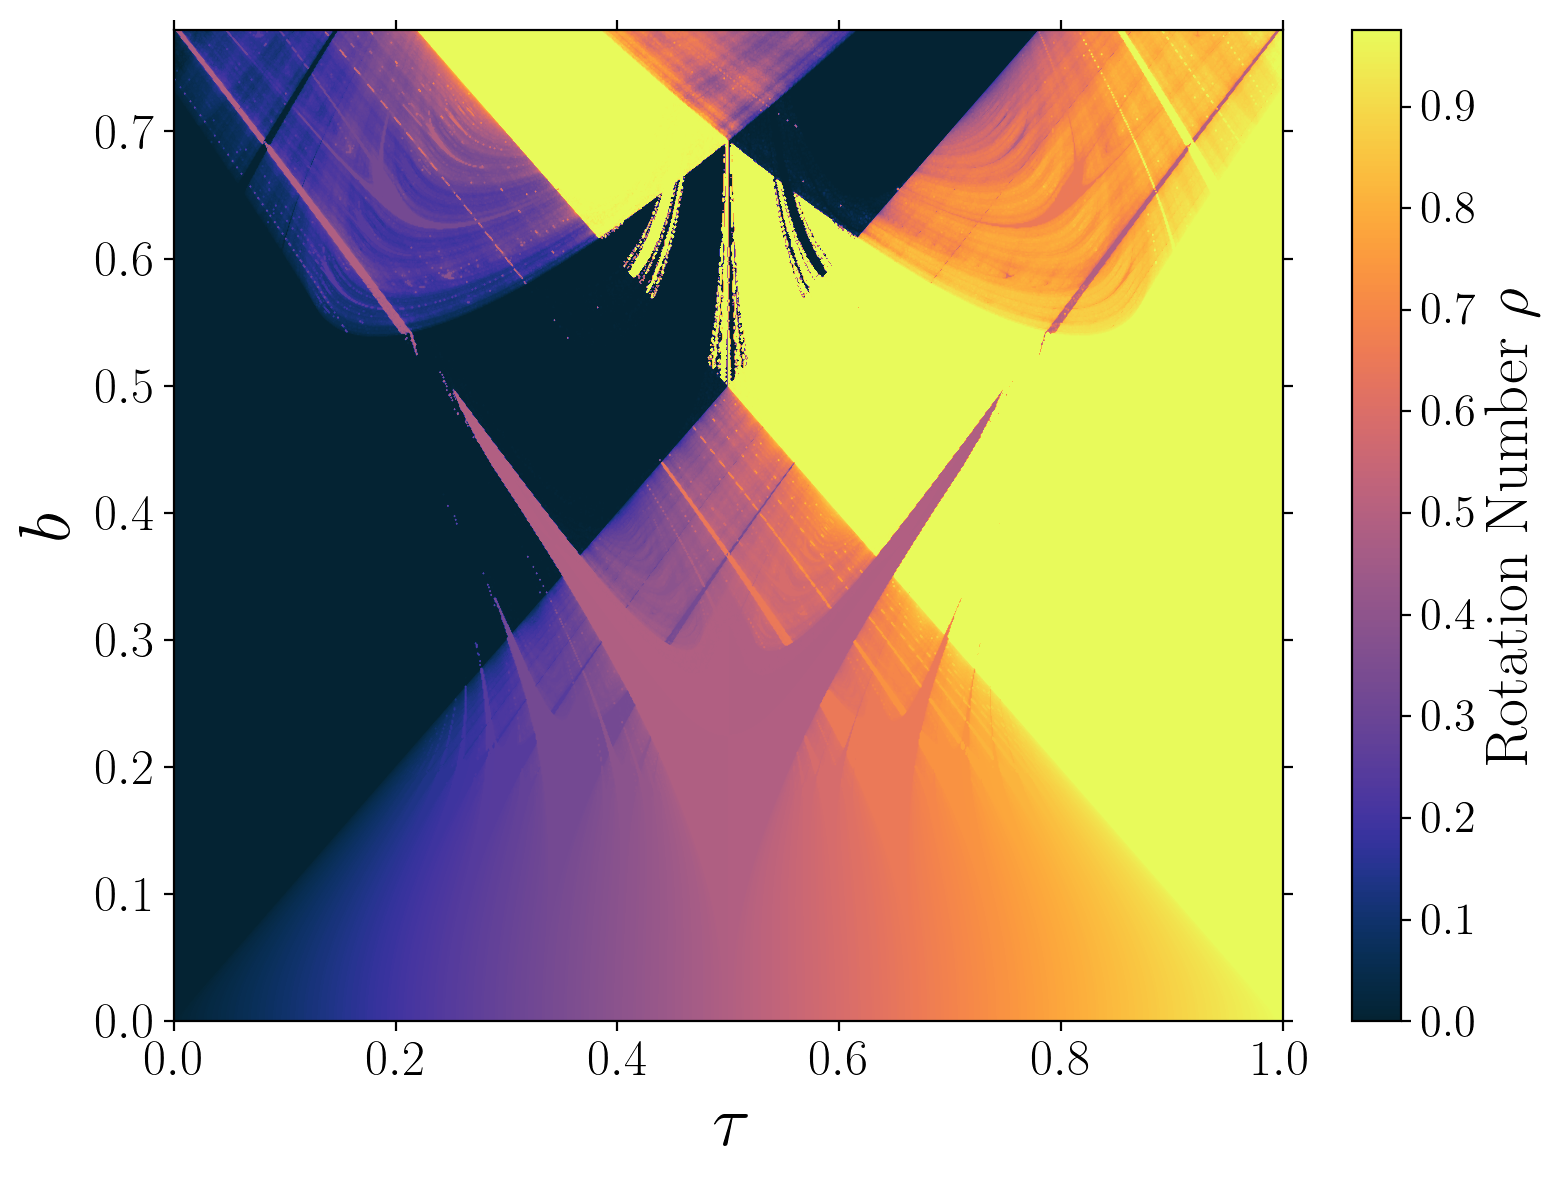

In [29]:
import cmocean
import cmocean.cm as cmo
fig, ax =plt.subplots()   

# edit the rot num if desired just to clean pictures 
rot_num_post = np.copy(rot_num)

rot_num_post[rot_num > 1] = 1.
rot_num_post[rot_num < 0] = 0.

CF = plt.contourf(TAU, B, rot_num_post, levels=400, cmap=cmo.thermal)

# axis labels
plt.xlabel(r"$\tau$", fontsize=26, color = 'k')
plt.ylabel(r"$b$", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=18, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=18, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=8)
ax.locator_params(axis='x', nbins=8)

plt.xlim([0.,1.])
plt.ylim([0.,0.78])

# make colorbar
cbar = plt.colorbar(CF,  format='%.1f')
cbar.ax.tick_params(labelsize=16, color='k') 
#plt.clim(0,1)
cbar.ax.set_ylabel(r'Rotation Number $\rho$', fontsize=22, color='k')

# the final piece of the colorbar defn is to change the colorbar ticks to an acceptable color.
# This is not so easy, and relies on the thread at
# https://stackoverflow.com/questions/9662995/matplotlib-change-title-and-colorbar-text-and-tick-colors
cbytick_obj = plt.getp(cbar.ax.axes, 'yticklabels')                #
plt.setp(cbytick_obj, color='k')

fig.set_size_inches(8,6)

plt.tight_layout()

#figname = 'arnold_tongues_rotation_num.png'
#plt.savefig(figname, dpi=700)

plt.show()

What a breathtakingly complex structure! Note in particular the snake-tongue shape around the level value $\rho=\frac12$, as well as the other smaller snake-tongues near it. These shapes are known as **Arnol'd tongues**. The Arnol'd tongues carry significant information on phase-locking: their width initially increases with $b$, meaning that phase locking becomes more robust, but when $b$ gets large enough they split off and thin out, meaning phase locking is more unstable. 

It turns out that the "back" of each Arnol'd tongue (that is, its $b=0$ shape) is a rational value of $\tau$. This is very interesting: for the $b=0$ case, periodic orbits are characterized by rational $\tau$. Arnol'd tongues tell us that periodic forcing modifies these "vanilla" periodic orbits in a highly nontrivial way. 

Arnol'd tongue-like shapes appear in other plots related to circle dynamics. For a striking demonstration of Arnol'd tongues in biology, see Mosheiff et al. 

In conclusion, we've seen a great deal of complex geometry hidden within in the Arnol'd circle map. However, the geometry was not so complex as to prevent us from getting profound insights into the dynamics (in particular, the robustness of phase-locking). 